# **SCRUB INFO FROM ARTICLES BY SAVING AS TEXT FILE**

In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
from scipy.stats import iqr as sc
import statsmodels.api as sm
pd.set_option('max_columns', 100)

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
import plotly.express as px
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("Hub version: ", hub.__version__)

TF version:  2.9.2
Hub version:  0.12.0


In [ ]:
import nltk
import os
import nltk.corpus

In [ ]:
# Importing Porterstemmer from nltk library
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#upload file
from google.colab import files
uploaded = files.upload()

Saving PASSIVE.txt to PASSIVE (5).txt


In [ ]:
#Decode file and save
file_name = "PASSIVE.txt"
article = uploaded[file_name].decode("utf-8")
article = uploaded[file_name].decode("utf-8").split("\r\n")

In [ ]:
import resource
import os

#import text file

txt_file = '/content/drive/MyDrive/Colab Notebooks/PASSIVE.txt'

print(f'File Size is {os.stat(txt_file).st_size / (1024 * 1024)} MB')

fileread = open(txt_file)

File Size is 0.01868152618408203 MB


In [ ]:
count = 0

for line in fileread:
    #process file line by line here,take count of lines
    count += 1

fileread.close()

print(f'Number of Lines in the file is {count}')

print('Peak Memory Usage =', resource.getrusage(resource.RUSAGE_SELF).ru_maxrss)
print('User Mode Time =', resource.getrusage(resource.RUSAGE_SELF).ru_utime)
print('System Mode Time =', resource.getrusage(resource.RUSAGE_SELF).ru_stime)

Number of Lines in the file is 160
Peak Memory Usage = 3326256
User Mode Time = 146.362455
System Mode Time = 14.850737


In [ ]:
#with open('/content/drive/MyDrive/Colab Notebooks/PASSIVE.txt', 'r') as f: 
    #print(f.read())

In [ ]:
with open('PASSIVE.txt', 'r') as file:
    file_df = file.read().replace('\n\n', '')

In [ ]:
file_df

'The 4 Best Passive Income Investments:\nIn finance, passive income describes money from a one-time investment that continually generates income flows, without requiring the investor to monitor or actively adjust their holdings. Passive income, like active income from working, is taxable, but often is given different treatment by the IRS. For instance, passive losses can be used to offset passive gains.\n1Aside from the difference in tax classification, many individuals seek passive income to bolster cash flows, and the term has grown in common parlance to include activities like working from home or side-gigs that require little effort (even though they may be taxed as active income).Some ways to generate passive income involve becoming a limited partner in a partnership. However, ordinary individuals can look to other ways to put their money to work for them. The passive investing strategies below warrant a closer look.KEY TAKEAWAYS\n\t•\tPassive income describes money earned from do

In [ ]:
import textwrap
print(textwrap.fill(file_df))

The 4 Best Passive Income Investments: In finance, passive income
describes money from a one-time investment that continually generates
income flows, without requiring the investor to monitor or actively
adjust their holdings. Passive income, like active income from
working, is taxable, but often is given different treatment by the
IRS. For instance, passive losses can be used to offset passive gains.
1Aside from the difference in tax classification, many individuals
seek passive income to bolster cash flows, and the term has grown in
common parlance to include activities like working from home or side-
gigs that require little effort (even though they may be taxed as
active income).Some ways to generate passive income involve becoming a
limited partner in a partnership. However, ordinary individuals can
look to other ways to put their money to work for them. The passive
investing strategies below warrant a closer look.KEY TAKEAWAYS
•       Passive income describes money earned from do

In [ ]:
#Lexicon Normalization
#performing stemming and Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

print("NORMALIZED ARTICLE:",lem.lemmatize(file_df))

NORMALIZED ARTICLE: The 4 Best Passive Income Investments:
In finance, passive income describes money from a one-time investment that continually generates income flows, without requiring the investor to monitor or actively adjust their holdings. Passive income, like active income from working, is taxable, but often is given different treatment by the IRS. For instance, passive losses can be used to offset passive gains.
1Aside from the difference in tax classification, many individuals seek passive income to bolster cash flows, and the term has grown in common parlance to include activities like working from home or side-gigs that require little effort (even though they may be taxed as active income).Some ways to generate passive income involve becoming a limited partner in a partnership. However, ordinary individuals can look to other ways to put their money to work for them. The passive investing strategies below warrant a closer look.KEY TAKEAWAYS
	•	Passive income describes money 

In [ ]:
#print(file_df.strip())
#file_df.strip('\n\t')

In [ ]:
# Number of lines 
lines = file_df.splitlines()
print("Number of lines: ",len(lines))

Number of lines:  67


In [ ]:
#length
len(file_df)

19368

In [ ]:
#size
print(sys.getsizeof(file_df))

38810


In [ ]:
#frequency distribution of article
fdist = FreqDist(file_df)
print(fdist)

<FreqDist with 83 samples and 19368 outcomes>


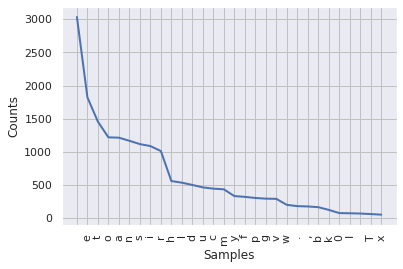

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
#find most common letters
fdist.most_common(25)

[(' ', 3035),
 ('e', 1821),
 ('t', 1454),
 ('o', 1217),
 ('a', 1212),
 ('n', 1165),
 ('s', 1115),
 ('i', 1085),
 ('r', 1010),
 ('h', 557),
 ('l', 532),
 ('d', 498),
 ('u', 461),
 ('c', 442),
 ('m', 432),
 ('y', 330),
 ('f', 318),
 ('p', 301),
 ('g', 291),
 ('v', 288),
 ('w', 197),
 ('.', 178),
 (',', 173),
 ('b', 162),
 ('k', 121)]

In [ ]:
 #Checking for words w the list of commong letters
stm = ["e", "t", "o"]
for word in file_df :
   print(word)

Streaming output truncated to the last 5000 lines.
e
n
 
t
h
e
s
e
 
c
h
a
r
g
e
s
,
 
c
o
n
s
i
d
e
r
 
u
s
i
n
g
 
a
 
d
i
s
c
o
u
n
t
 
b
r
o
k
e
r
 
t
h
a
t
 
d
o
e
s
 
n
o
t
 
c
h
a
r
g
e
 
a
 
c
o
m
m
i
s
s
i
o
n
—
o
r
 
p
l
a
n
 
t
o
 
i
n
v
e
s
t
 
l
e
s
s
 
o
f
t
e
n
,
 
p
e
r
h
a
p
s
 
i
n
v
e
s
t
i
n
g
 
l
a
r
g
e
r
 
a
m
o
u
n
t
s
 
q
u
a
r
t
e
r
l
y
 
r
a
t
h
e
r
 
t
h
a
n
 
m
a
k
i
n
g
 
s
m
a
l
l
 
m
o
n
t
h
l
y
 
p
u
r
c
h
a
s
e
s
.
H
o
w
 
t
o
 
I
n
v
e
s
t
 
i
n
 
P
e
e
r
-
t
o
-
P
e
e
r
 
L
e
n
d
i
n
g
 
a
n
d
 
C
r
o
w
d
f
u
n
d
i
n
g


T
o
w
a
r
d
 
t
h
e
 
t
o
p
 
o
f
 
t
h
e
 
r
i
s
k
 
c
o
n
t
i
n
u
u
m
,
 
t
h
e
r
e
’
s
 
i
n
v
e
s
t
i
n
g
 
i
n
 
p
e
e
r
-
t
o
-
p
e
e
r
 
l
e
n
d
i
n
g
.
 
C
r
o
w
d
f
u
n
d
e
r
s
 
c
o
n
n
e
c
t
 
i
n
v
e
s
t
o
r
s
 
w
i
t
h
 
m
o
n
e
y
 
t
o
 
l
e
n
d
 
a
n
d
 
e
n
t
r
e
p
r
e
n
e
u
r
s
 
t
r
y
i
n
g
 
t
o
 
f
u
n
d
 
n
e
w
 
v
e
n
t
u
r
e
s
.
 
A
s
 
t
h
e
 
l
o
a
n
s
 
a
r
e
 
r
e
p
a
i
d
,
 
i
n
v
e
s
t
o
r
s
 
r
e
c
e
i
v

In [ ]:
#Word tokenizer breaks text paragraph into words.
tokenized_word=word_tokenize(file_df)
print(tokenized_word)

['The', '4', 'Best', 'Passive', 'Income', 'Investments', ':', 'In', 'finance', ',', 'passive', 'income', 'describes', 'money', 'from', 'a', 'one-time', 'investment', 'that', 'continually', 'generates', 'income', 'flows', ',', 'without', 'requiring', 'the', 'investor', 'to', 'monitor', 'or', 'actively', 'adjust', 'their', 'holdings', '.', 'Passive', 'income', ',', 'like', 'active', 'income', 'from', 'working', ',', 'is', 'taxable', ',', 'but', 'often', 'is', 'given', 'different', 'treatment', 'by', 'the', 'IRS', '.', 'For', 'instance', ',', 'passive', 'losses', 'can', 'be', 'used', 'to', 'offset', 'passive', 'gains', '.', '1Aside', 'from', 'the', 'difference', 'in', 'tax', 'classification', ',', 'many', 'individuals', 'seek', 'passive', 'income', 'to', 'bolster', 'cash', 'flows', ',', 'and', 'the', 'term', 'has', 'grown', 'in', 'common', 'parlance', 'to', 'include', 'activities', 'like', 'working', 'from', 'home', 'or', 'side-gigs', 'that', 'require', 'little', 'effort', '(', 'even', 't

In [ ]:
#frequency distribution of words
fdist1 = FreqDist(tokenized_word)
print(fdist1)

<FreqDist with 1069 samples and 3600 outcomes>


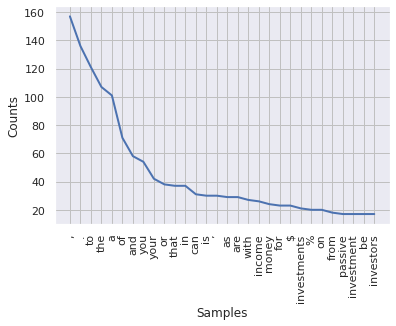

In [ ]:
# Frequency Distribution Plot 
import matplotlib.pyplot as plt
fdist1.plot(30,cumulative=False)
plt.show()

In [ ]:
#find most commong key words
fdist1.most_common(25)

[(',', 157),
 ('.', 136),
 ('to', 121),
 ('the', 107),
 ('a', 101),
 ('of', 71),
 ('and', 58),
 ('you', 54),
 ('your', 42),
 ('or', 38),
 ('that', 37),
 ('in', 37),
 ('can', 31),
 ('is', 30),
 ('’', 30),
 ('as', 29),
 ('are', 29),
 ('with', 27),
 ('income', 26),
 ('money', 24),
 ('for', 23),
 ('$', 23),
 ('investments', 21),
 ('%', 20),
 ('on', 20)]

In [ ]:
# split the text
#splitted_text = file_df.split() 
#print("Splitted text: ",splitted_text)

In [ ]:
# words which starts with "I"(Income):
words_start_with_I = [word for word in tokenized_word if word.startswith("I")]
print("Words with I: ",words_start_with_I) 

Words with I:  ['Income', 'Investments', 'In', 'IRS', 'IRS', 'Investors', 'It', 'III', 'Investors', 'Investors', 'Index', 'Index', 'Income', 'Investment', 'Is', 'Income', 'Investment', 'Income', 'Investments', 'Idea', 'In', 'In', 'Income', 'Investment', 'If', 'Investment', 'Inflation', 'In', 'Investopedia', 'Investing', 'In', 'If', 'If', 'IRAs', 'In', 'If', 'It', 'Investment', 'In', 'Invest', 'It', 'If', 'It', 'Invest', 'Invest', 'Invest', 'If', 'Investing', 'Invest', 'Industrials', 'It', 'Invest', 'Investing', 'It']


In [ ]:
# words which starts with "M"(Money):
words_start_with_M = [word for word in tokenized_word if word.startswith("M")]
print("Words with M: ",words_start_with_M) 

Words with M:  ['MLM', 'Makes', 'Masterworks', 'Many', 'Many', 'Maximize', 'Minimize', 'Make']


In [ ]:
# words which starts with "R"(Retirement):
words_start_with_R = [word for word in tokenized_word if word.startswith("R")]
print("Words with R: ",words_start_with_R) 

Words with R:  ['Real', 'REITs', 'REITs', 'Real', 'REITs', 'Returns', 'REITs', 'REIT', 'Retirement', 'Roth', 'Refund', 'Recommendations', 'REIT', 'REIT', 'REITs', 'REITs', 'Real', 'Returns']


In [ ]:
# words which starts with "E"(Estate):
words_start_with_E = [word for word in tokenized_word if word.startswith("E")]
print("Words with E: ",words_start_with_E) 

Words with E:  ['Estate', 'ETF', 'ETF', 'ETFs', 'ETF', 'ETFs', 'ETFs', 'ETFs', 'Equity']


In [ ]:
# words which starts with "W"(Wealth):
words_start_with_W = [word for word in tokenized_word if word.startswith("W")]
print("Words with W: ",words_start_with_W) 

Words with W:  ['While', 'When', 'What', 'With', 'Whether', 'With', 'While', 'With', 'With', 'When', 'While', 'While']


In [ ]:
#UNIQUE WORDS
print("unique words: ",set(tokenized_word))  

unique words:  {'industry', 'access', 'continually', 'adjust', 'as', 'back', 'make', 'rich', 'Make', 'via', 'reinvesting', 'overall', 'priority', 'budget', 'Funds', '4', 'Budget', 'check', 'security', 'initially', 'company', 'inflation', 'pocket', 'hundred—dollars.Here', 'advantages', 'find', 'dividend', 'significantly', 'taxed', 'U.S.', '9Real', 'pay', 'weigh', 'competition', 'option', 'low-rollers', 'allows', 'myth', 'Paying', 'rapidly', 'require', 'monthly', 'or', 'accounts', 'quite', '40-year', 'rules', 'discharge', 'others', 'exact', 'applications.The', 'In', 'rates', 'is', 'difference', 'portion', 'not', 'Makes', 'place', 'Amount', 'net', 'Invest', '500', 'mortgages', 'aside', 'Carefully', 'different', 'attention', 'fee-only', 'implies', 'Roth', 'gains', 'exposure', 'transact', 'those', 'indexing', 'residential', 'During', 'allocations', 'Recommendations', 'until', 'fierce', 'of', 'shares.How', 'commission—or', 'losses', 'After', 'active', 'The', 'leaps', 'stream', 'REIT', 'many'

In [ ]:
import itertools
import time
import sys
import sys
import os

In [ ]:
#separate each features in line
for i in range(len(article)):
  article[i] = article[i].split(",")

print(article)

[['The 4 Best Passive Income Investments:\nIn finance', ' passive income describes money from a one-time investment that continually generates income flows', ' without requiring the investor to monitor or actively adjust their holdings. Passive income', ' like active income from working', ' is taxable', ' but often is given different treatment by the IRS. For instance', ' passive losses can be used to offset passive gains.\n1\n\nAside from the difference in tax classification', ' many individuals seek passive income to bolster cash flows', ' and the term has grown in common parlance to include activities like working from home or side-gigs that require little effort (even though they may be taxed as active income).\n\nSome ways to generate passive income involve becoming a limited partner in a partnership. However', ' ordinary individuals can look to other ways to put their money to work for them. The passive investing strategies below warrant a closer look.\n\nKEY TAKEAWAYS\n\t•\tPass

In [ ]:
#Transposing 
new_mat=zip(*article)
for row in new_mat:
    print(row)

('The 4 Best Passive Income Investments:\nIn finance',)
(' passive income describes money from a one-time investment that continually generates income flows',)
(' without requiring the investor to monitor or actively adjust their holdings. Passive income',)
(' like active income from working',)
(' is taxable',)
(' but often is given different treatment by the IRS. For instance',)
(' passive losses can be used to offset passive gains.\n1\n\nAside from the difference in tax classification',)
(' many individuals seek passive income to bolster cash flows',)
(' and the term has grown in common parlance to include activities like working from home or side-gigs that require little effort (even though they may be taxed as active income).\n\nSome ways to generate passive income involve becoming a limited partner in a partnership. However',)
(' ordinary individuals can look to other ways to put their money to work for them. The passive investing strategies below warrant a closer look.\n\nKEY TAK

In [ ]:
#flatten
#b = list(itertools.chain.from_iterable(article))
#print(b)

In [ ]:
#tokenizing
#text= file_df
#tokenized_text=sent_tokenize(text)
#SO = print(tokenized_text)

In [ ]:
# split the text
#splitted_text = file_df.split() # default split methods splits text according to spaces
#print("Splitted text: ",splitted_text) 

In [ ]:
# normalization
#words = file_df
words_list = file_df.lower().split(" ")
#print("normalized words: ",words_list)

In [ ]:
import nltk as nlp

In [ ]:
# stemming
stemming_word_list = file_df
porter_stemmer = nlp.PorterStemmer()
roots = [porter_stemmer.stem(each) for each in stemming_word_list]
print("Stemming Words: ",roots)

Stemming Words:  ['t', 'h', 'e', ' ', '4', ' ', 'b', 'e', 's', 't', ' ', 'p', 'a', 's', 's', 'i', 'v', 'e', ' ', 'i', 'n', 'c', 'o', 'm', 'e', ' ', 'i', 'n', 'v', 'e', 's', 't', 'm', 'e', 'n', 't', 's', ':', '\n', 'i', 'n', ' ', 'f', 'i', 'n', 'a', 'n', 'c', 'e', ',', ' ', 'p', 'a', 's', 's', 'i', 'v', 'e', ' ', 'i', 'n', 'c', 'o', 'm', 'e', ' ', 'd', 'e', 's', 'c', 'r', 'i', 'b', 'e', 's', ' ', 'm', 'o', 'n', 'e', 'y', ' ', 'f', 'r', 'o', 'm', ' ', 'a', ' ', 'o', 'n', 'e', '-', 't', 'i', 'm', 'e', ' ', 'i', 'n', 'v', 'e', 's', 't', 'm', 'e', 'n', 't', ' ', 't', 'h', 'a', 't', ' ', 'c', 'o', 'n', 't', 'i', 'n', 'u', 'a', 'l', 'l', 'y', ' ', 'g', 'e', 'n', 'e', 'r', 'a', 't', 'e', 's', ' ', 'i', 'n', 'c', 'o', 'm', 'e', ' ', 'f', 'l', 'o', 'w', 's', ',', ' ', 'w', 'i', 't', 'h', 'o', 'u', 't', ' ', 'r', 'e', 'q', 'u', 'i', 'r', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'i', 'n', 'v', 'e', 's', 't', 'o', 'r', ' ', 't', 'o', ' ', 'm', 'o', 'n', 'i', 't', 'o', 'r', ' ', 'o', 'r', ' ', 'a', '

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# lemmatization
lemma = nlp.WordNetLemmatizer()
lemma_roots = [lemma.lemmatize(each) for each in stemming_word_list]
print("Lemmatization: ",lemma_roots)

Lemmatization:  ['T', 'h', 'e', ' ', '4', ' ', 'B', 'e', 's', 't', ' ', 'P', 'a', 's', 's', 'i', 'v', 'e', ' ', 'I', 'n', 'c', 'o', 'm', 'e', ' ', 'I', 'n', 'v', 'e', 's', 't', 'm', 'e', 'n', 't', 's', ':', '\n', 'I', 'n', ' ', 'f', 'i', 'n', 'a', 'n', 'c', 'e', ',', ' ', 'p', 'a', 's', 's', 'i', 'v', 'e', ' ', 'i', 'n', 'c', 'o', 'm', 'e', ' ', 'd', 'e', 's', 'c', 'r', 'i', 'b', 'e', 's', ' ', 'm', 'o', 'n', 'e', 'y', ' ', 'f', 'r', 'o', 'm', ' ', 'a', ' ', 'o', 'n', 'e', '-', 't', 'i', 'm', 'e', ' ', 'i', 'n', 'v', 'e', 's', 't', 'm', 'e', 'n', 't', ' ', 't', 'h', 'a', 't', ' ', 'c', 'o', 'n', 't', 'i', 'n', 'u', 'a', 'l', 'l', 'y', ' ', 'g', 'e', 'n', 'e', 'r', 'a', 't', 'e', 's', ' ', 'i', 'n', 'c', 'o', 'm', 'e', ' ', 'f', 'l', 'o', 'w', 's', ',', ' ', 'w', 'i', 't', 'h', 'o', 'u', 't', ' ', 'r', 'e', 'q', 'u', 'i', 'r', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'i', 'n', 'v', 'e', 's', 't', 'o', 'r', ' ', 't', 'o', ' ', 'm', 'o', 'n', 'i', 't', 'o', 'r', ' ', 'o', 'r', ' ', 'a', 'c

In [ ]:
# stemming
porter_stemmer = nlp.PorterStemmer()
roots = [porter_stemmer.stem(each) for each in words_list]
print("Root Stemming: ",roots)

Root Stemming:  ['the', '4', 'best', 'passiv', 'incom', 'investments:\nin', 'finance,', 'passiv', 'incom', 'describ', 'money', 'from', 'a', 'one-tim', 'invest', 'that', 'continu', 'gener', 'incom', 'flows,', 'without', 'requir', 'the', 'investor', 'to', 'monitor', 'or', 'activ', 'adjust', 'their', 'holdings.', 'passiv', 'income,', 'like', 'activ', 'incom', 'from', 'working,', 'is', 'taxable,', 'but', 'often', 'is', 'given', 'differ', 'treatment', 'by', 'the', 'irs.', 'for', 'instance,', 'passiv', 'loss', 'can', 'be', 'use', 'to', 'offset', 'passiv', 'gains.\n1asid', 'from', 'the', 'differ', 'in', 'tax', 'classification,', 'mani', 'individu', 'seek', 'passiv', 'incom', 'to', 'bolster', 'cash', 'flows,', 'and', 'the', 'term', 'ha', 'grown', 'in', 'common', 'parlanc', 'to', 'includ', 'activ', 'like', 'work', 'from', 'home', 'or', 'side-gig', 'that', 'requir', 'littl', 'effort', '(even', 'though', 'they', 'may', 'be', 'tax', 'as', 'activ', 'income).som', 'way', 'to', 'gener', 'passiv', 'in

***NATURAL LANGUAGE PROCESSING MODEL EXAMPLE: ***

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in file_df:
    stemmed_words.append(ps.stem(w))

#print("Filtered Sentence:",file_df)
print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['t', 'h', 'e', ' ', '4', ' ', 'b', 'e', 's', 't', ' ', 'p', 'a', 's', 's', 'i', 'v', 'e', ' ', 'i', 'n', 'c', 'o', 'm', 'e', ' ', 'i', 'n', 'v', 'e', 's', 't', 'm', 'e', 'n', 't', 's', ':', '\n', 'i', 'n', ' ', 'f', 'i', 'n', 'a', 'n', 'c', 'e', ',', ' ', 'p', 'a', 's', 's', 'i', 'v', 'e', ' ', 'i', 'n', 'c', 'o', 'm', 'e', ' ', 'd', 'e', 's', 'c', 'r', 'i', 'b', 'e', 's', ' ', 'm', 'o', 'n', 'e', 'y', ' ', 'f', 'r', 'o', 'm', ' ', 'a', ' ', 'o', 'n', 'e', '-', 't', 'i', 'm', 'e', ' ', 'i', 'n', 'v', 'e', 's', 't', 'm', 'e', 'n', 't', ' ', 't', 'h', 'a', 't', ' ', 'c', 'o', 'n', 't', 'i', 'n', 'u', 'a', 'l', 'l', 'y', ' ', 'g', 'e', 'n', 'e', 'r', 'a', 't', 'e', 's', ' ', 'i', 'n', 'c', 'o', 'm', 'e', ' ', 'f', 'l', 'o', 'w', 's', ',', ' ', 'w', 'i', 't', 'h', 'o', 'u', 't', ' ', 'r', 'e', 'q', 'u', 'i', 'r', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'i', 'n', 'v', 'e', 's', 't', 'o', 'r', ' ', 't', 'o', ' ', 'm', 'o', 'n', 'i', 't', 'o', 'r', ' ', 'o', 'r', ' ', 'a', 

In [ ]:
# !pip install sentencepiece
!pip install bert-for-tf2
import bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# BERT requires a MAX_SEQ_LENGTH that can be any integer<=512.
# pick a smaller number to cut down computation cost.
max_seq_length = 250

In [ ]:
# BERT requires the following three types of inputs (more on them later)
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")

In [ ]:
#load the already pre-trained BERT layers
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=True)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

In [ ]:
model = models.Model(inputs=[input_word_ids, input_mask, segment_ids], 
                     outputs=[pooled_output, sequence_output])

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 250)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 250)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 250)]        0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 250, 768)]                'input_mask[0][0]',       